In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#
np.random.seed(10)
# number of patients
n = 100
# number of weeks
T = 52
transmission_status = pd.DataFrame(index=range(n), columns=range(0, T+1))
# proportion infected at start
p_I0 = 0.1
transmission_status[0] = np.random.binomial(1, p_I0, 100)

In [3]:
# diff eq deterministic version
class SIS_model():
    def __init__(self, timesteps, pop_size, alpha, beta, gamma):
        self.T = timesteps
        self.N = pop_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.S = np.zeros(timesteps)
        self.I = np.zeros(timesteps)

    def simulate(self):
        n_infected = int(self.alpha * self.N)
        self.I[0] = n_infected
        self.S[0] = self.N - n_infected
        for t in range(1, self.T):
            S = self.S[t-1]
            I = self.I[t-1]
            inf_flow = self.beta * S * I / self.N + self.alpha * S * self.gamma
            sus_flow =  (1 - self.alpha) * I * self.gamma
            self.S[t] = S - inf_flow + sus_flow
            self.I[t] = I - sus_flow + inf_flow
            assert np.abs(S + I - self.N) < 0.01

In [12]:
T = 52
N = 1000
model = SIS_model(T, N,  0.1, 0.1, .05)
model.simulate()

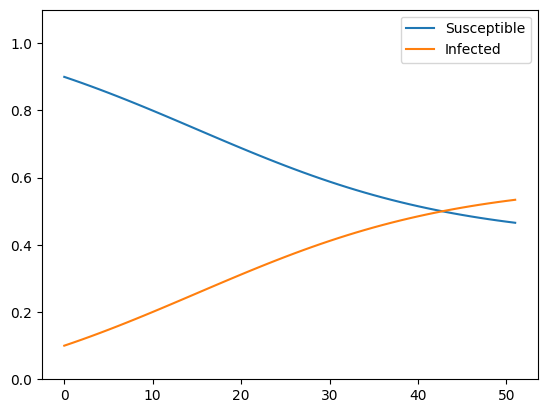

In [13]:
x = np.arange(T)
plt.plot(x, model.S / N, label="Susceptible")
plt.plot(x, model.I/N, label="Infected")
plt.ylim(0, 1.1)
plt.legend(loc="upper right")
plt.show()

In [42]:
# infection rate
beta = .01
# proportion admitted who are infected
alpha = .1 # maybe make this the same as p_I0
# discharge rate
gamma = .05

for t in range(1, T+1):
    status = transmission_status[t-1]
    for j in range(n):
        if status[j] == 0:
            hazard_j = status.sum() * beta
            p_j = 1 - np.exp(-hazard_j)
            transmission_status.loc[j, t] = np.random.binomial(1, p_j)
        
        else:
            transmission_status.loc[j, t] = 1

        # calc probability of discharge
        discharge = np.random.binomial(1, gamma)
        if discharge: 
            transmission_status.loc[j, t] = np.random.binomial(1, alpha)

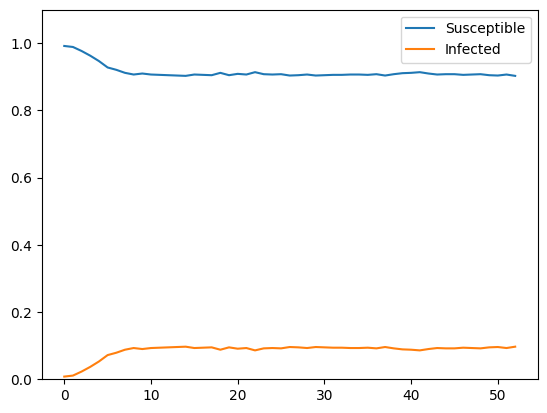

In [49]:
x = np.arange(T+1)
I = transmission_status.sum(0)
S = N - I
plt.plot(x, S/N, label="Susceptible")
plt.plot(x, I/N, label="Infected")
plt.ylim(0, 1.1)
plt.legend(loc="upper right")
plt.show()